In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
files = glob.glob("states*.csv")

In [109]:
states_list = []
for filename in files:
    data = pd.read_csv(filename)
    states_list.append(data)

In [110]:
us_census = pd.concat(states_list)

In [111]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


In [130]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women,MalePop,FemalePop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0,510388,543273
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0,2322409,2455167
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0,423477,419713
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0,3167756,3331859
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0,13171316,13367298


In [131]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 5
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     object 
 4   White       60 non-null     object 
 5   Black       60 non-null     object 
 6   Native      60 non-null     object 
 7   Asian       60 non-null     object 
 8   Pacific     55 non-null     object 
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
 11  Men         60 non-null     int64  
 12  Women       60 non-null     float64
 13  MalePop     60 non-null     int64  
 14  FemalePop   60 non-null     int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 7.5+ KB


In [129]:
us_census.describe()

,Unnamed: 0,TotalPop,Income,Men,Women,MalePop,FemalePop
count,60.000000,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,2.500000,6.238516e+06,56632.042833,3.067189e+06,3.171327e+06,3.067189e+06,3.060988e+06
std,1.722237,6.588488e+06,11470.953879,3.250785e+06,3.338251e+06,3.250785e+06,3.394400e+06
min,0.000000,6.266040e+05,20720.540000,3.066740e+05,3.180310e+05,3.066740e+05,0.000000e+00
25%,1.000000,2.030429e+06,49536.930000,1.006712e+06,1.023717e+06,1.006712e+06,9.048625e+05
50%,2.500000,4.701414e+06,54239.860000,2.291782e+06,2.409632e+06,2.291782e+06,2.111962e+06
75%,4.000000,7.303256e+06,64341.505000,3.631031e+06,3.672225e+06,3.631031e+06,3.672225e+06
max,5.000000,3.842146e+07,78765.400000,1.908714e+07,1.933433e+07,1.908714e+07,1.933433e+07


In [117]:
us_census.nunique()

Unnamed: 0     6
State         51
TotalPop      51
Hispanic      50
White         51
Black         50
Native        39
Asian         49
Pacific       18
Income        51
GenderPop     51
dtype: int64

In [118]:
for index in range(0,len(us_census["Income"])):
    string = str(us_census['Income'].iat[index])
    replace_dol = string.replace('$', '')
    replace_com = replace_dol.replace(',', '')
    us_census['Income'].iat[index] = replace_com

In [119]:
us_census["Income"] = pd.to_numeric(us_census['Income'])

In [120]:
Men = []
Women = []
for index in range(0,len(us_census["GenderPop"])):
    string = str(us_census['GenderPop'].iat[index])
    replace = string.split('_')
    Men.append(replace[0])
    Women.append(replace[1])

In [121]:
us_census['Men'] = Men
us_census['Women'] = Women

In [122]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388M,543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409M,2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477M,419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756M,3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316M,13367298F


In [123]:
for index in range(0,len(us_census["Men"])):
    string = str(us_census['Men'].iat[index])
    replace = string.replace('M', '')
    us_census['Men'].iat[index] = replace
    
for index in range(0,len(us_census["Women"])):
    string = str(us_census['Women'].iat[index])
    replace = string.replace('F', '')
    us_census['Women'].iat[index] = replace

In [124]:
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

In [128]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women,MalePop,FemalePop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0,510388,543273
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0,2322409,2455167
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0,423477,419713
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0,3167756,3331859
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0,13171316,13367298


In [126]:
def clean_gender_data(value):
    if pd.isna(value) or value == '':
        return 0
    else:
        return int(value)

# Split the 'GenderPop' column into two columns
gender_split = us_census['GenderPop'].str.split('_')
us_census['MalePop'] = gender_split.str.get(0).str[:-1]
us_census['FemalePop'] = gender_split.str.get(1).str[:-1]

# Clean and convert the 'MalePop' and 'FemalePop' columns to integers
us_census['MalePop'] = us_census['MalePop'].apply(clean_gender_data)
us_census['FemalePop'] = us_census['FemalePop'].apply(clean_gender_data)


In [127]:
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])

In [93]:
us_census.duplicated(subset = us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [132]:
census = us_census.drop_duplicates(subset = us_census.columns[1:])
census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women,MalePop,FemalePop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0,510388,543273
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0,2322409,2455167
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0,423477,419713
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0,3167756,3331859
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0,13171316,13367298


In [133]:
census.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       4
Income        0
GenderPop     0
Men           0
Women         0
MalePop       0
FemalePop     0
dtype: int64

In [135]:
census[census.isnull().any(axis=1)]

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women,MalePop,FemalePop
4,4,North Dakota,721640,2.83%,87.45%,1.28%,5.65%,0.96%,NaN,58188.11,367963M_353677F,367963,353677.0,367963,353677
1,1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,53885.61,1439862M_1453125F,1439862,1453125.0,1439862,1453125
0,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,64657.80,2648667M_2630239F,2648667,2630239.0,2648667,2630239
2,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,61827.98,448413M_478041F,448413,478041.0,448413,478041


In [136]:
df_filled = census.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)
df_filled.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women,MalePop,FemalePop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0,510388,543273
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0,2322409,2455167
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0,423477,419713
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0,3167756,3331859
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0,13171316,13367298


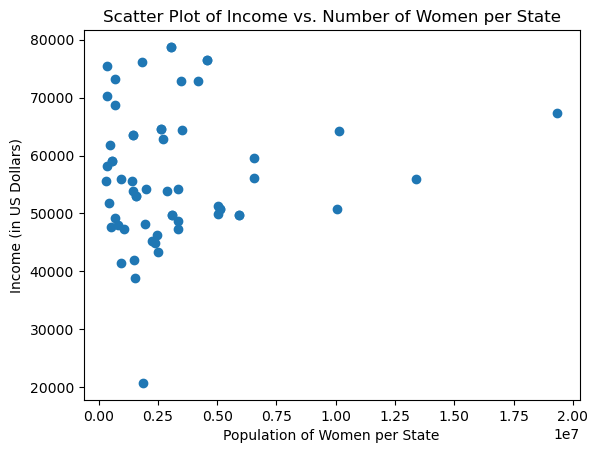

In [139]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()

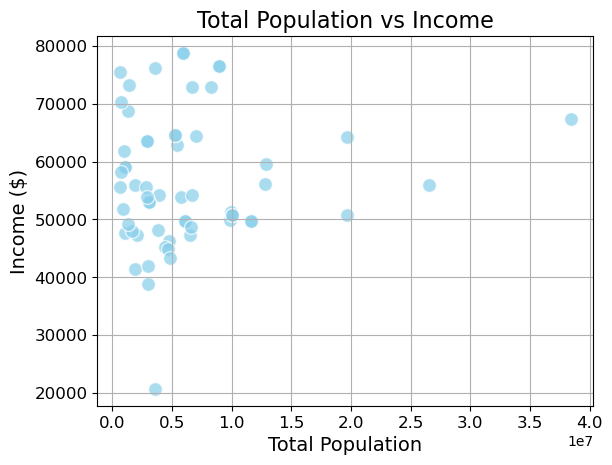

In [162]:
plt.scatter(us_census['TotalPop'], us_census['Income'], s=100, alpha=0.7, edgecolors='w', color='skyblue')
plt.title('Total Population vs Income', fontsize=16)
plt.xlabel('Total Population', fontsize=14)
plt.ylabel('Income ($)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

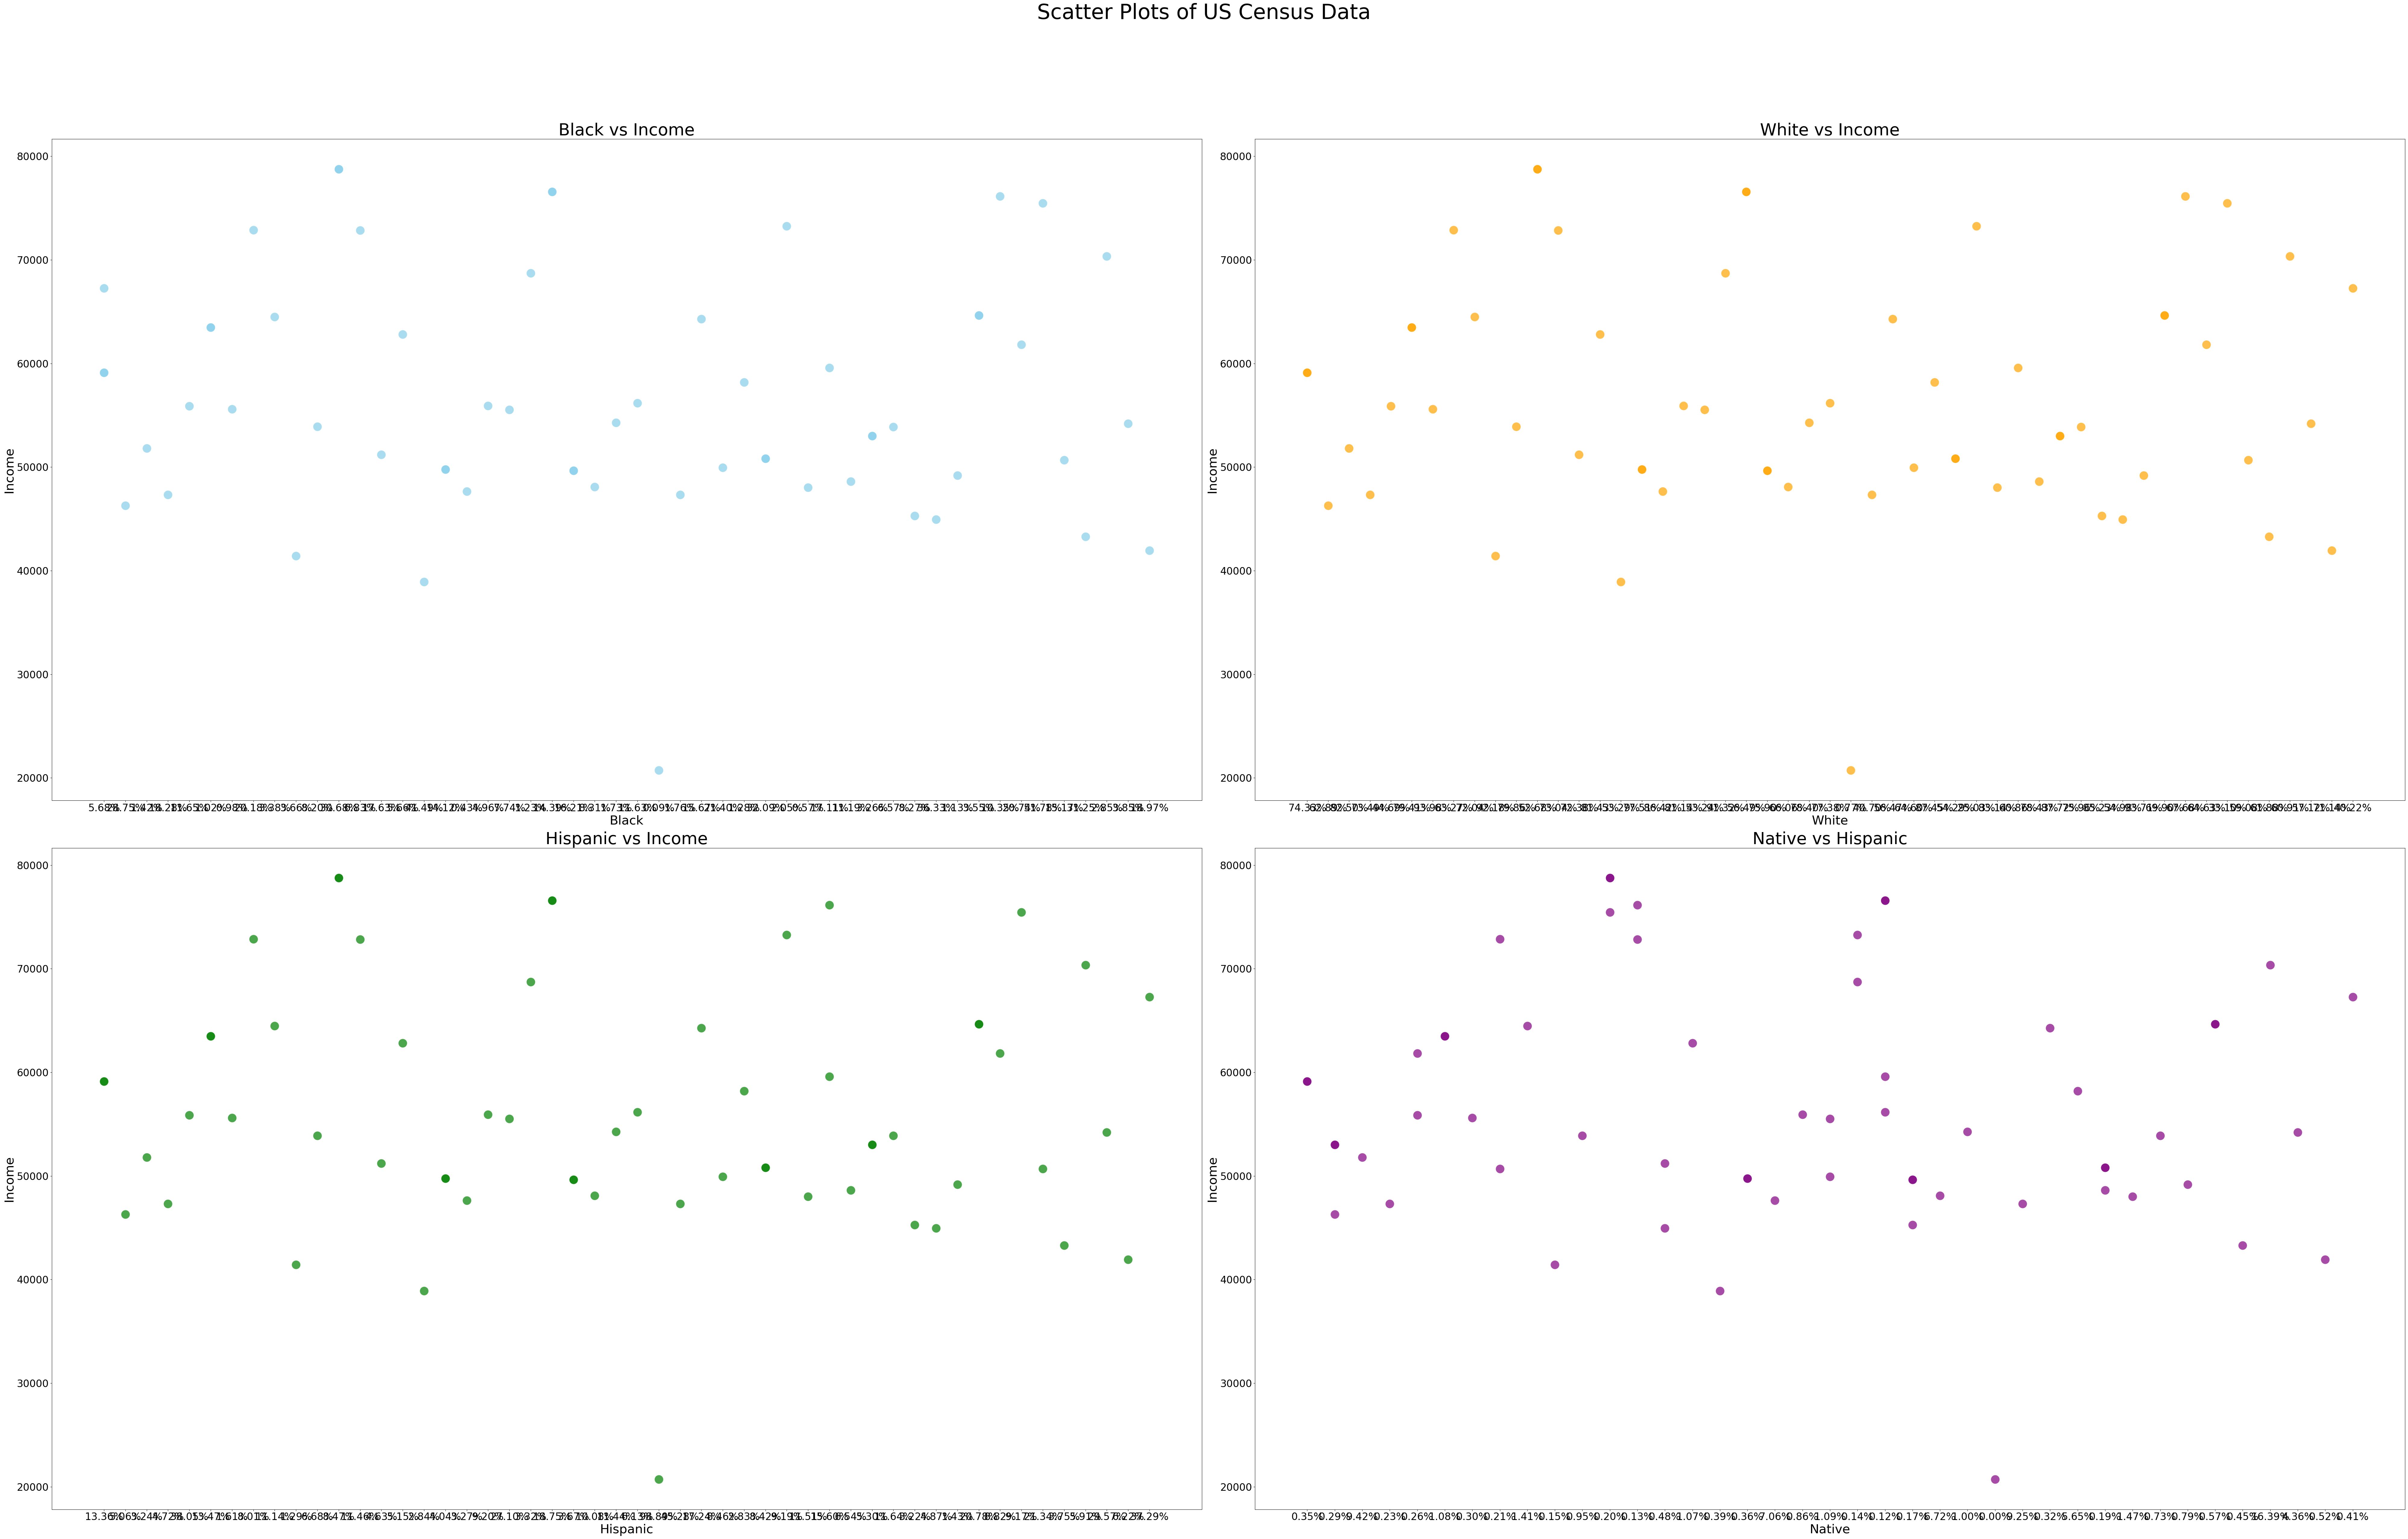

In [179]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(80, 50))
fig.suptitle('Scatter Plots of US Census Data', fontsize=50, y=1.02)

# Scatter plot 1: Total Population vs Income
axes[0, 0].scatter(us_census['Black'], us_census['Income'], s=450, alpha=0.7, edgecolors='w', color='skyblue')
axes[0, 0].set_xlabel('Black', fontsize=30)
axes[0, 0].set_ylabel('Income', fontsize=30)
axes[0, 0].set_title('Black vs Income', fontsize=40)
axes[0, 0].tick_params(axis='both', which='major', labelsize=24)

# Scatter plot 2: White Population vs Income
axes[0, 1].scatter(us_census['White'], us_census['Income'], s=450, alpha=0.7, edgecolors='w', color='orange')
axes[0, 1].set_xlabel('White', fontsize=30)
axes[0, 1].set_ylabel('Income', fontsize=30)
axes[0, 1].set_title('White vs Income', fontsize=40)
axes[0, 1].tick_params(axis='both', which='major', labelsize=24)

# Scatter plot 3: Black Population vs Income
axes[1, 0].scatter(us_census['Hispanic'], us_census['Income'], s=450, alpha=0.7, edgecolors='w', color='green')
axes[1, 0].set_xlabel('Hispanic', fontsize=30)
axes[1, 0].set_ylabel('Income', fontsize=30)
axes[1, 0].set_title('Hispanic vs Income', fontsize=40)
axes[1, 0].tick_params(axis='both', which='major', labelsize=24)

# Scatter plot 4: Native Population vs Income
axes[1, 1].scatter(us_census['Native'], us_census['Income'], s=450, alpha=0.7, edgecolors='w', color='purple')
axes[1, 1].set_xlabel('Native', fontsize=30)
axes[1, 1].set_ylabel('Income', fontsize=30)
axes[1, 1].set_title('Native vs Hispanic', fontsize=40)
axes[1, 1].tick_params(axis='both', which='major', labelsize=24)

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


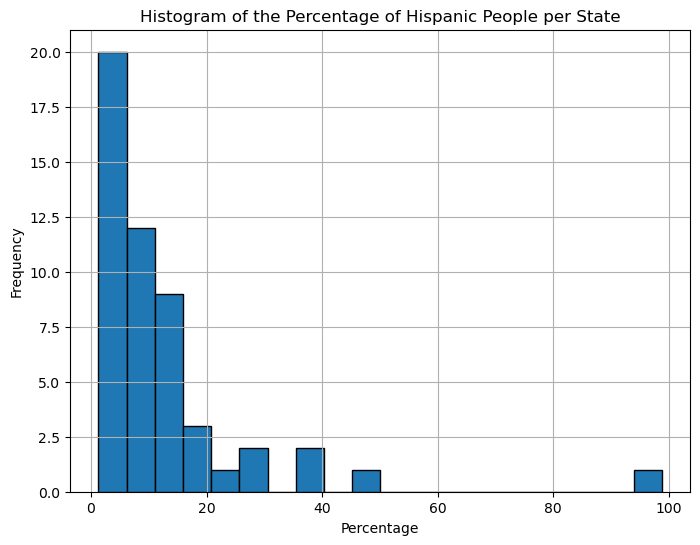

<Figure size 640x480 with 0 Axes>

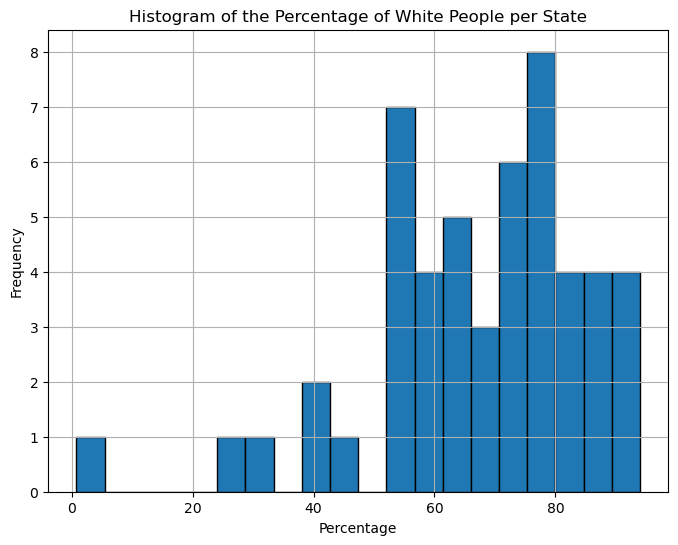

<Figure size 640x480 with 0 Axes>

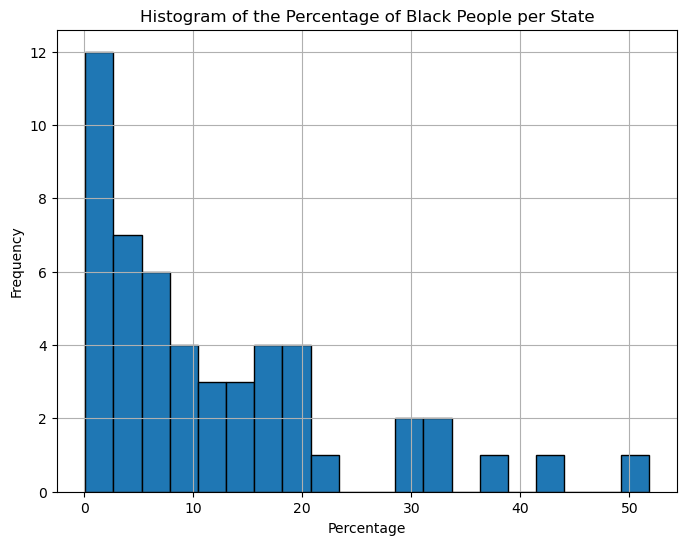

<Figure size 640x480 with 0 Axes>

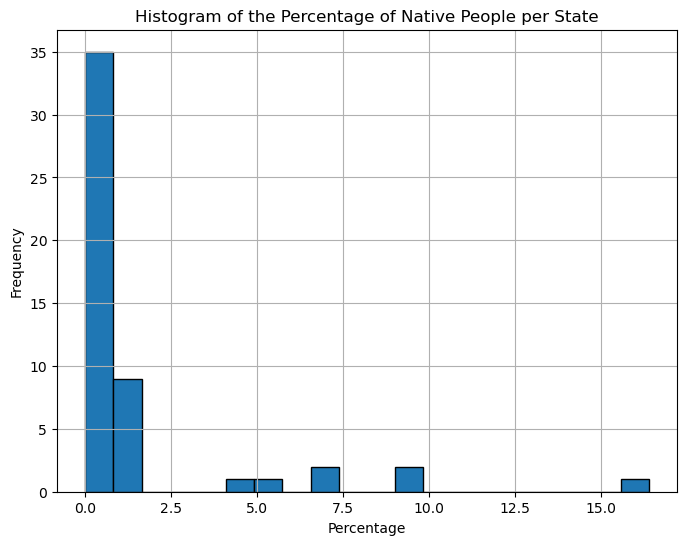

<Figure size 640x480 with 0 Axes>

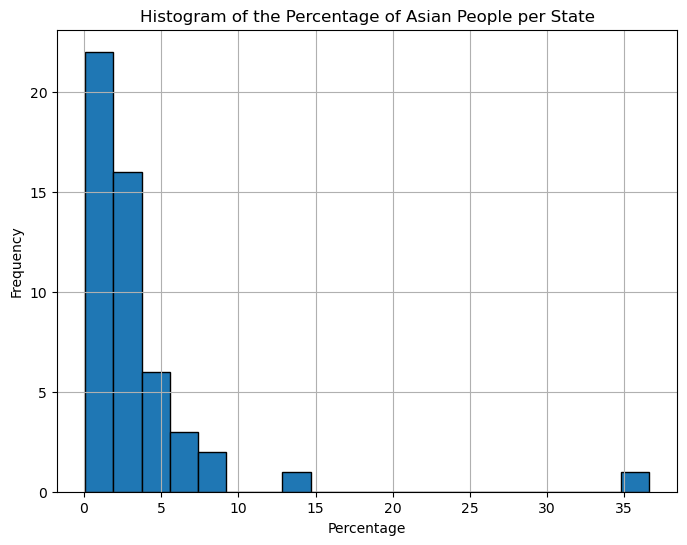

<Figure size 640x480 with 0 Axes>

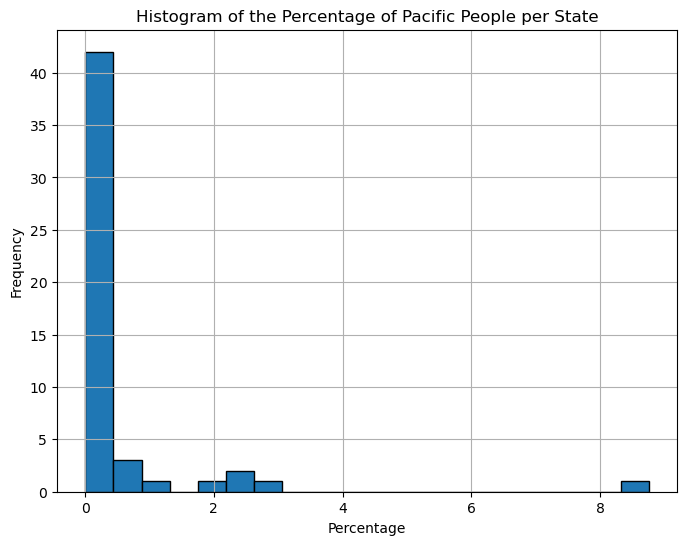

<Figure size 640x480 with 0 Axes>

In [181]:

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    us_census[race] = pd.to_numeric(us_census[race].str.replace('%', ''), errors='coerce')

# Fill NaN values in 'Pacific' column
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

# Drop duplicates based on all columns except the first (State) assuming index is reset
census = us_census.drop_duplicates(subset=us_census.columns[1:])

# Plot histograms for each race column
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.figure(figsize=(8, 6))
    plt.hist(census[race], bins=20, edgecolor='black')
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    plt.clf()  # Clear the current figure to avoid overlapping plots


In [145]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women',
       'MalePop', 'FemalePop'],
      dtype='object')

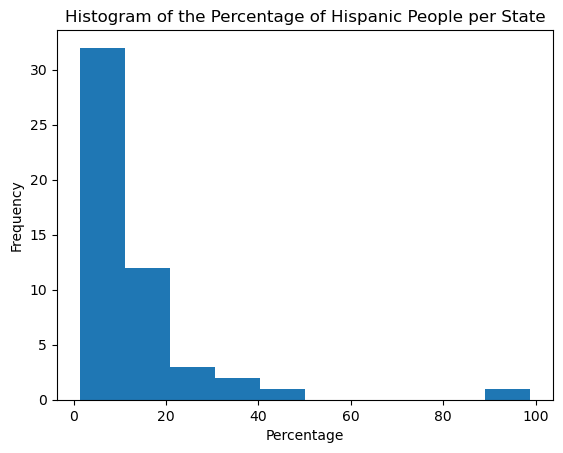

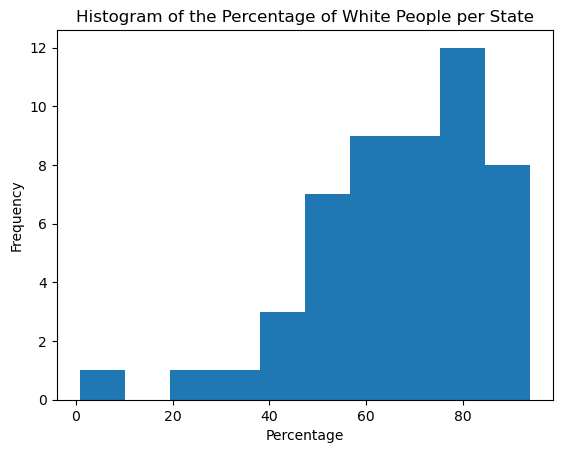

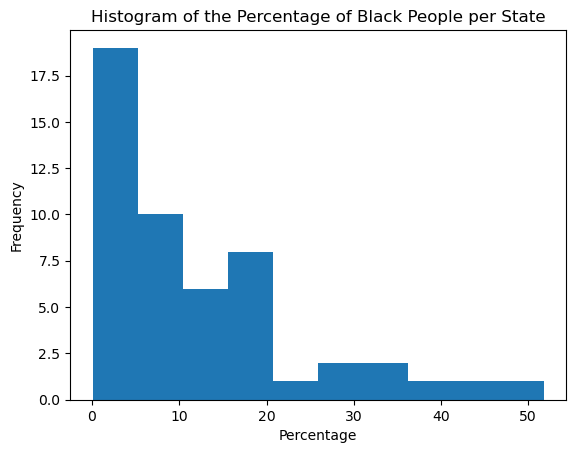

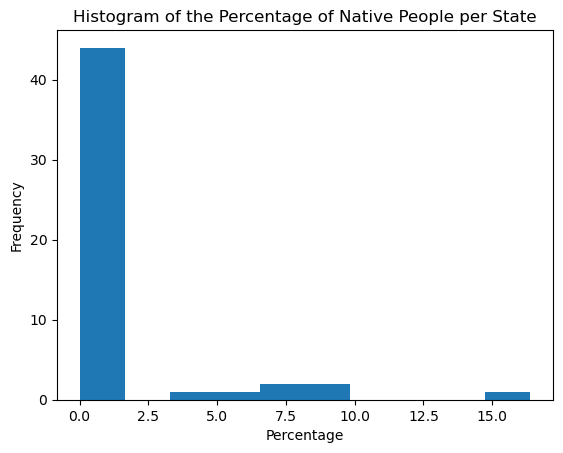

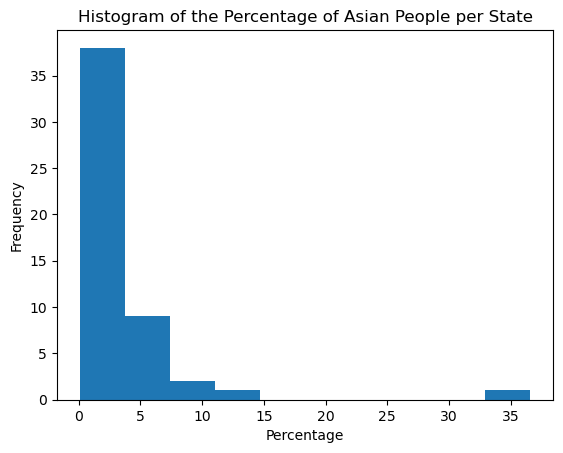

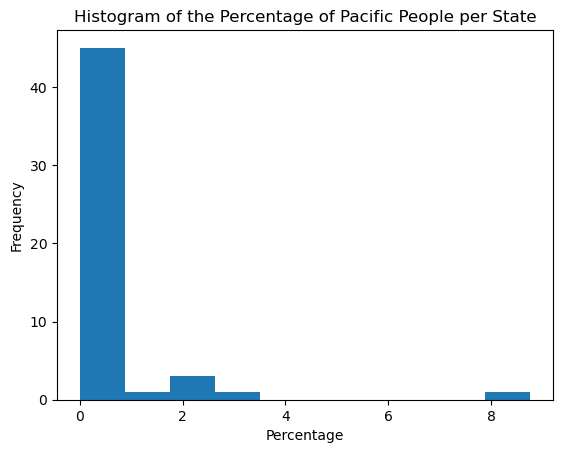

<Figure size 640x480 with 0 Axes>

In [99]:
for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    for index in range(0,len(us_census)):    
        string = str(us_census[race].iat[index])
        replace = string.replace('%', '')
        if (replace == "nan"):
            replace = ""
        us_census[race].iat[index] = replace
    us_census[race] = pd.to_numeric(us_census[race])
    
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

census = us_census.drop_duplicates(subset = us_census.columns[1:])
census

for race in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(census[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()

In [66]:
# Handle missing values in FemalePop before converting to int
us_census['FemalePop'] = us_census['FemalePop'].replace('', np.nan).astype(float)
us_census['FemalePop'] = us_census['FemalePop'].fillna(0).astype(int)

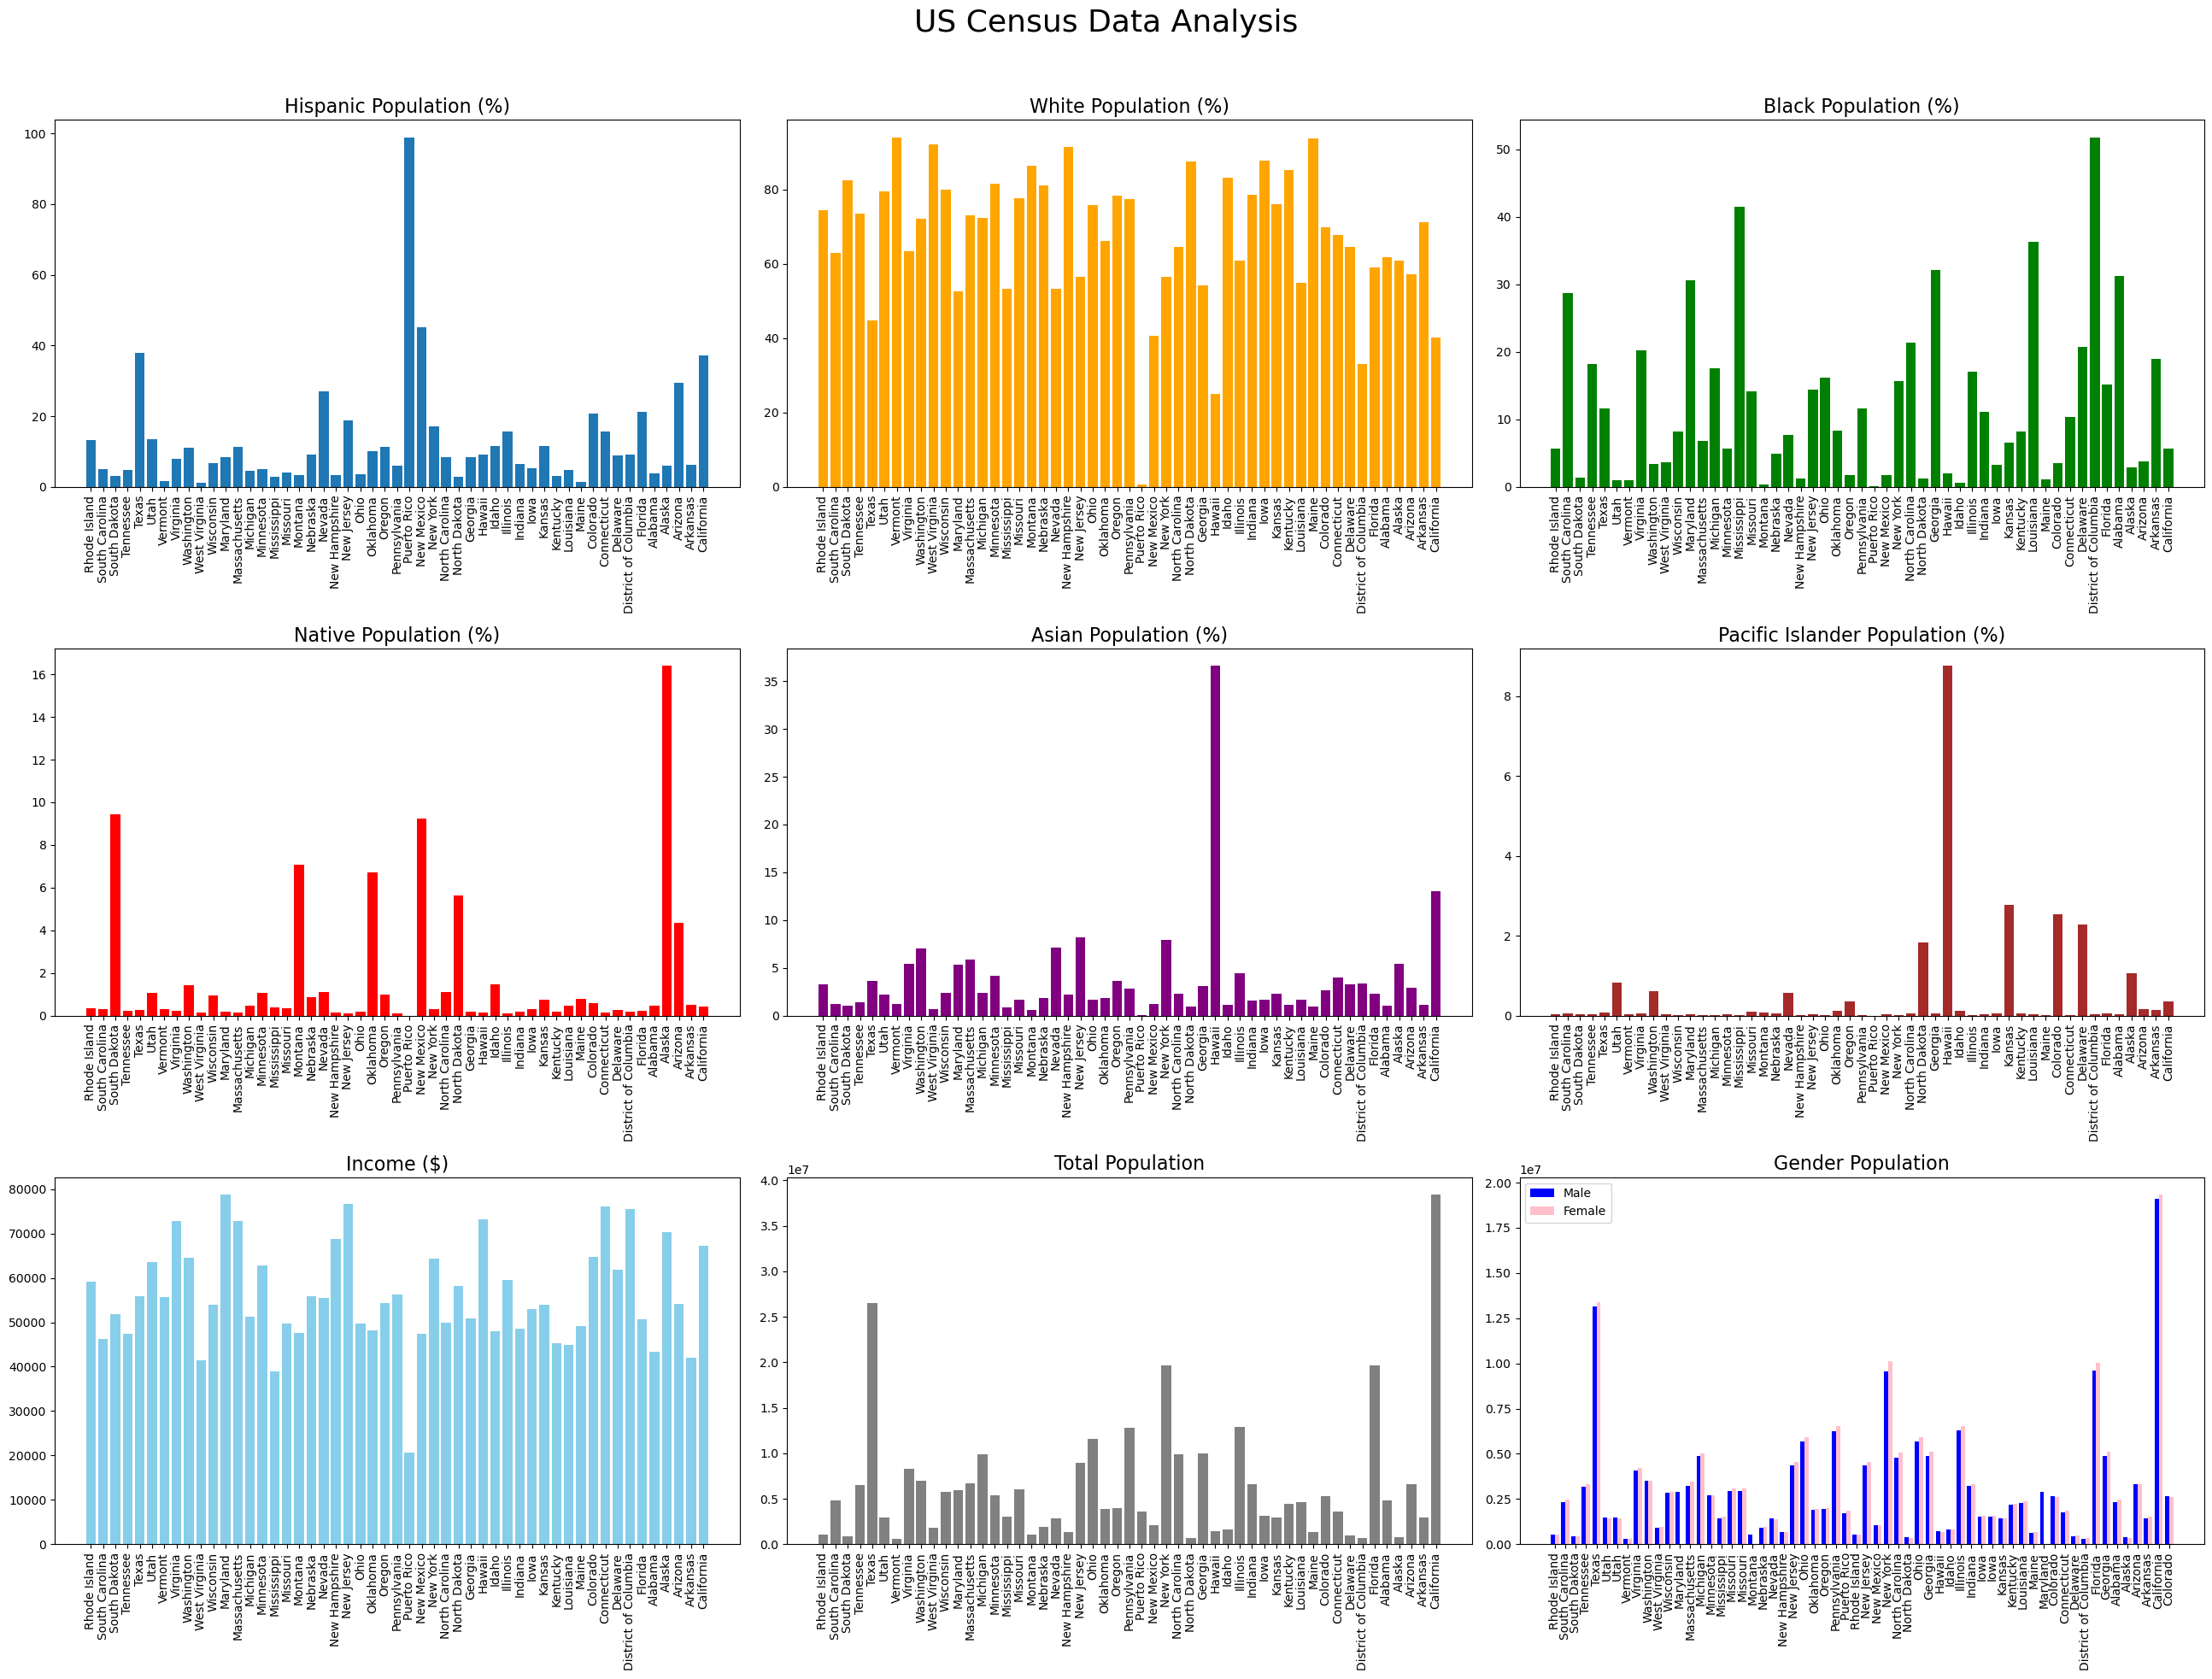

In [101]:
import matplotlib.pyplot as plt

# Set up subplots with a larger figure size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(26, 20))
fig.suptitle('US Census Data Analysis', fontsize=26)

# Plot Hispanic population
axes[0, 0].bar(us_census['State'], us_census['Hispanic'])
axes[0, 0].set_title('Hispanic Population (%)', fontsize=16)
axes[0, 0].tick_params(axis='x', labelrotation=90, labelsize=10)

# Plot White population
axes[0, 1].bar(us_census['State'], us_census['White'], color='orange')
axes[0, 1].set_title('White Population (%)', fontsize=16)
axes[0, 1].tick_params(axis='x', labelrotation=90, labelsize=10)

# Plot Black population
axes[0, 2].bar(us_census['State'], us_census['Black'], color='green')
axes[0, 2].set_title('Black Population (%)', fontsize=16)
axes[0, 2].tick_params(axis='x', labelrotation=90, labelsize=10)

# Plot Native population
axes[1, 0].bar(us_census['State'], us_census['Native'], color='red')
axes[1, 0].set_title('Native Population (%)', fontsize=16)
axes[1, 0].tick_params(axis='x', labelrotation=90, labelsize=10)

# Plot Asian population
axes[1, 1].bar(us_census['State'], us_census['Asian'], color='purple')
axes[1, 1].set_title('Asian Population (%)', fontsize=16)
axes[1, 1].tick_params(axis='x', labelrotation=90, labelsize=10)

# Plot Pacific population
axes[1, 2].bar(us_census['State'], us_census['Pacific'], color='brown')
axes[1, 2].set_title('Pacific Islander Population (%)', fontsize=16)
axes[1, 2].tick_params(axis='x', labelrotation=90, labelsize=10)

# Plot Income
axes[2, 0].bar(us_census['State'], us_census['Income'], color='skyblue')
axes[2, 0].set_title('Income ($)', fontsize=16)
axes[2, 0].tick_params(axis='x', labelrotation=90, labelsize=10)

# Plot Total Population
axes[2, 1].bar(us_census['State'], us_census['TotalPop'], color='gray')
axes[2, 1].set_title('Total Population', fontsize=16)
axes[2, 1].tick_params(axis='x', labelrotation=90, labelsize=10)

# Plot GenderPop (Male vs Female)
ind = np.arange(len(us_census))
width = 0.4
axes[2, 2].bar(ind - width/2, us_census['MalePop'], width, label='Male', color='blue')
axes[2, 2].bar(ind + width/2, us_census['FemalePop'], width, label='Female', color='pink')
axes[2, 2].set_title('Gender Population', fontsize=16)
axes[2, 2].set_xticks(ind)
axes[2, 2].set_xticklabels(us_census['State'], rotation=90, fontsize=10)
axes[2, 2].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
